In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

# Import data 


In [38]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data


In [40]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

# Draw line plot

In [24]:
def draw_line_plot():   
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df.index, df['value'], color='blue')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.grid(True)

None


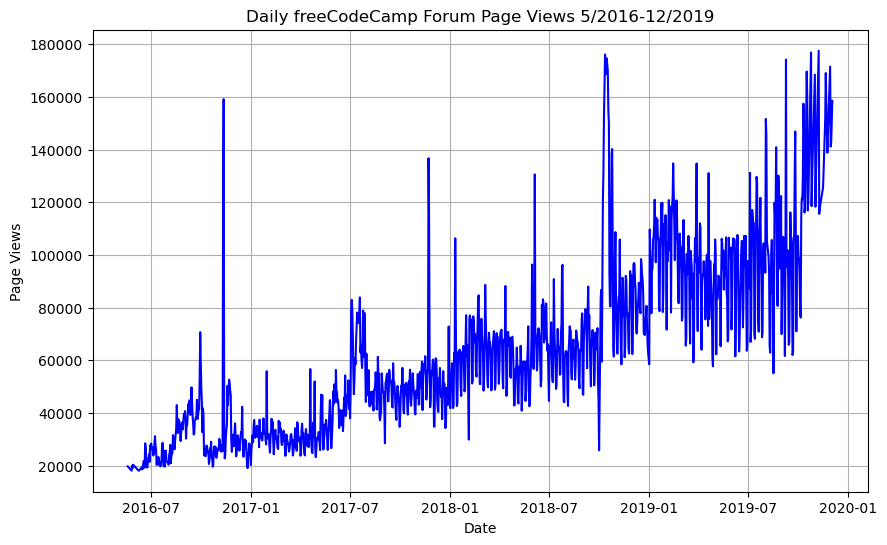

In [26]:
print(draw_line_plot())

# Draw Bar Chart

In [29]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Group by year and month to get the average page views
    df_bar = df_bar.groupby([df_bar['year'], df_bar['month']])['value'].mean().unstack()
    # Rename month numbers to month names for the legend
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    df_bar.columns = month_names

    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(10, 6), legend=True).figure
    plt.title('Average Daily Page Views per Month (Grouped by Year)')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', bbox_to_anchor=(1.05, 1), loc='upper left')


None


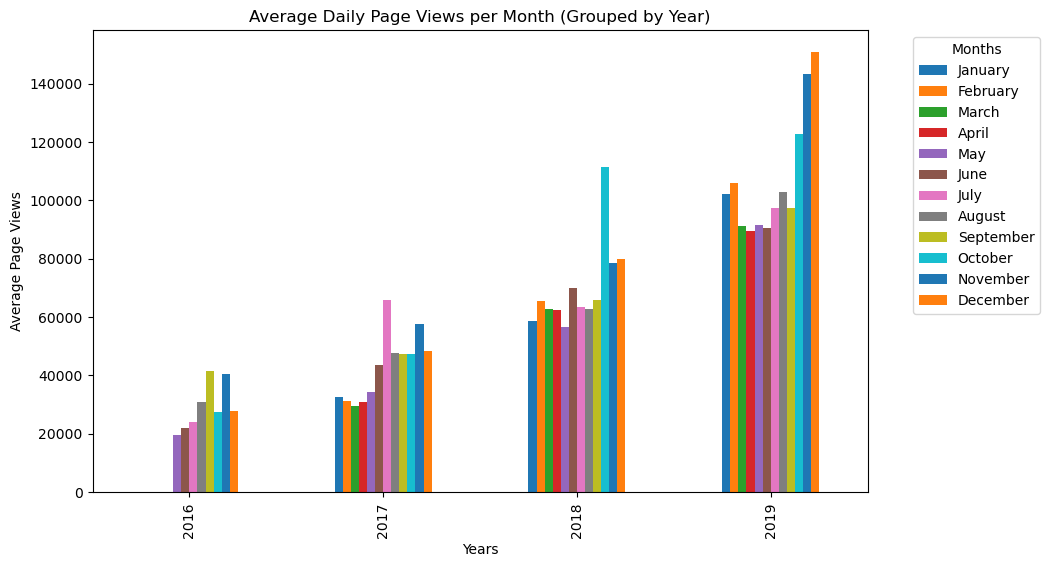

In [31]:
print(draw_bar_plot())

# Draw box plots (using Seaborn)

In [34]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]

    # Draw box plots 
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Year-wise box plot
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise box plot
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1],
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

None


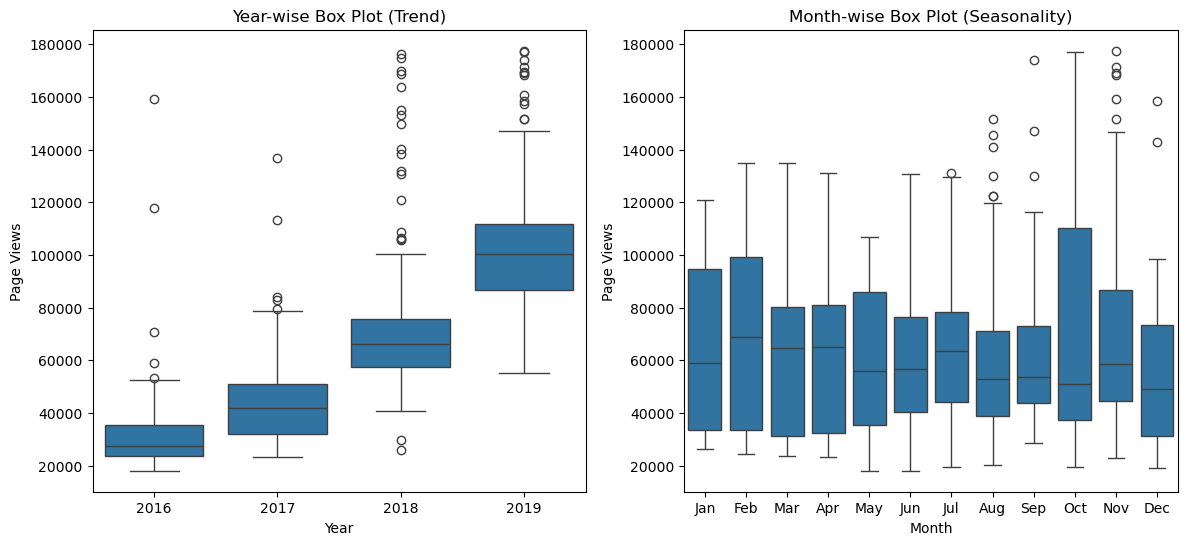

In [36]:
print(draw_box_plot())